# Özgür Özer

**Exercise 5.1**: The Caesar's cipher is a historically relevant way of encrypting messages, already used by Julius Caesar, that is a substitution cipher. Given an integer value m, any character is replaced by the character found shifting the original character by m positions in the alphabet. Prepare a function that encrypts or decrypts a given message (assuming we only use the 26 capital letters of the English alphaber and replacing other symbols that are not letters by themselves, e.g. spaces and punctuation symbols) using a given value of m. Hints: (1) You can transform a string in uppercase characters using the upper() method (up_strin = orig_string.upper()). (2) You can obtain the English ascii uppercase letters using the module string (import string) with the command ABC = string.ascii_uppercase.

In [1]:
from string import ascii_lowercase

In [2]:
def encrypt(string, m):
    return string.lower().translate(str.maketrans(ascii_lowercase, ascii_lowercase[m:] + ascii_lowercase[:m]))

In [3]:
encrypt("Life is but a walking shadow.", 2)

'nkhg ku dwv c ycnmkpi ujcfqy.'

In [4]:
def decrypt(string, m):
    return string.lower().translate(str.maketrans(ascii_lowercase[m:] + ascii_lowercase[:m], ascii_lowercase))

In [5]:
decrypt(encrypt("And then, is heard no more. It is a tale told by an idiot!", 2), 2)

'and then, is heard no more. it is a tale told by an idiot!'

**Exercise 5.2**: [The NIST Digital Library of Mathematical Functions](https://dlmf.nist.gov/) (DLMF) is a very useful site, where you can find an updated and expanded version of the well-known reference Handbook of Mathematical Functions compiled by Abramowitz and Stegun. Define a function to compute the Bessel function of the first kind of integer index from the series 10.2.2 in the DLMF, add a docscript and plot the functions of order 0, 1, and 2 in the interval of x between 0 and 10.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 16]

In [7]:
def bessel(z, v, n):
    """Return Bessel function with integer index v and argument z up to nth sum"""
    return (z/2)**v * np.array([(-z**2/4)**k / (np.math.factorial(k) * np.math.gamma(v + k + 1)) for k in range(n)]).sum()
bessel = np.vectorize(bessel)

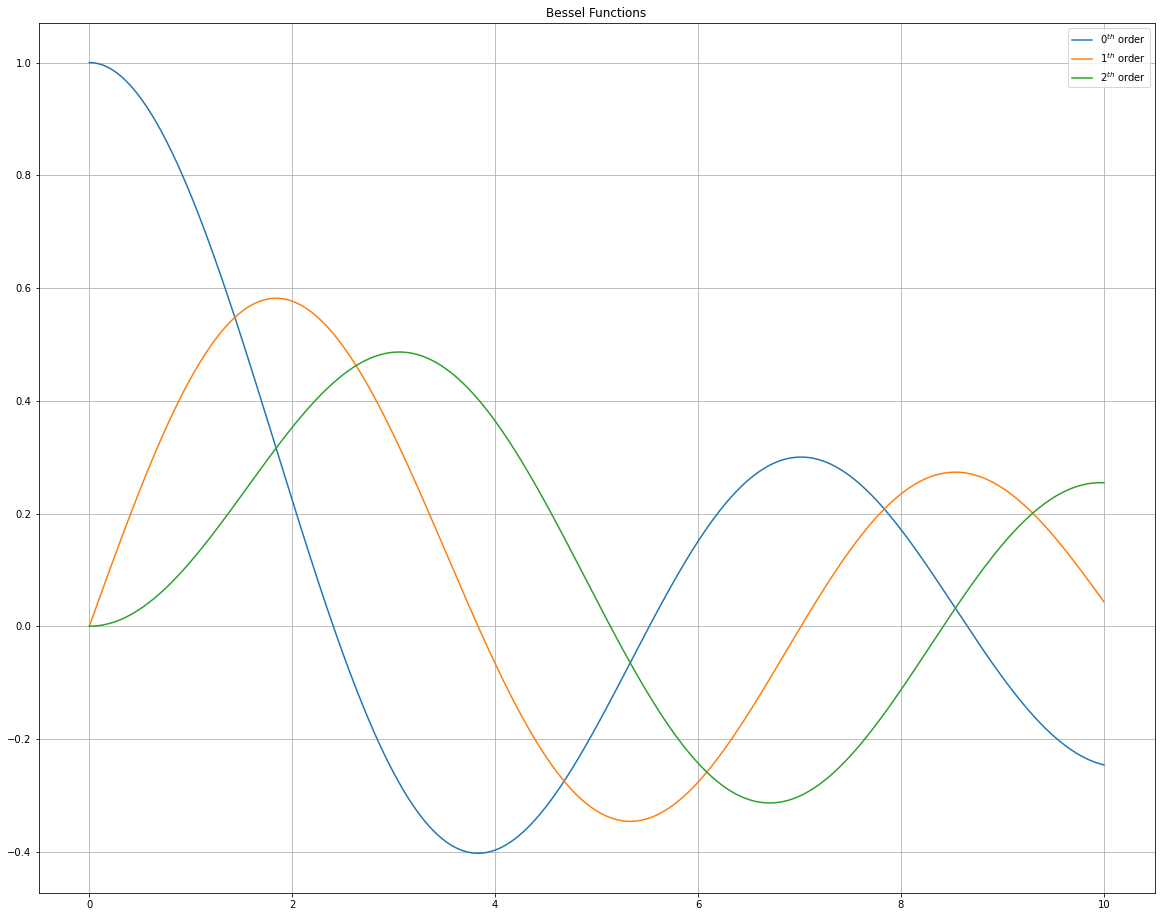

In [8]:
x = np.linspace(0, 10, 1000)
plt.plot(x, bessel(x,0,100), label="$0^{th}$ order")
plt.plot(x, bessel(x,1,100), label="$1^{th}$ order")
plt.plot(x, bessel(x,2,100), label="$2^{th}$ order")
plt.grid()
plt.title("Bessel Functions")
plt.legend()

**Exercise 5.3**: Define and test a function that estimates the value of the special constant pi by generating N pairs of random numbers in the interval -1 and 1 and checking how many of the generated number fall into a circumference of radius 1 centered in the origin. Improve the function showing in a graphical output the square, the circumference, and the points inside and outside the circumference with different colors.

In [9]:
def Pi(N): # considering the points are distributed uniformly the ratio of points inside to all points in the square is pi*1^2/4
    [x , y] = np.random.rand(2, N) * 2 - 1
    return  np.count_nonzero(np.sqrt(x**2 + y**2) < 1) / N * 4

In [10]:
Pi(100000)

3.13332

In [11]:
def PiPlot(n):
    r = np.random.rand(n, 2) * 2 - 1
    inside = np.sqrt(r[:,0]**2 + r[:,1]**2) < 1
    plt.figure(figsize=(16,16))
    plt.scatter(r[inside,0], r[inside,1], color='tab:purple', s=15)
    plt.scatter(r[~inside,0], r[~inside,1], color='tab:brown')
    x = np.linspace(0, 2 * np.pi, 1000)
    plt.plot(np.cos(x), np.sin(x))
    return np.count_nonzero(inside) / n * 4

3.1524

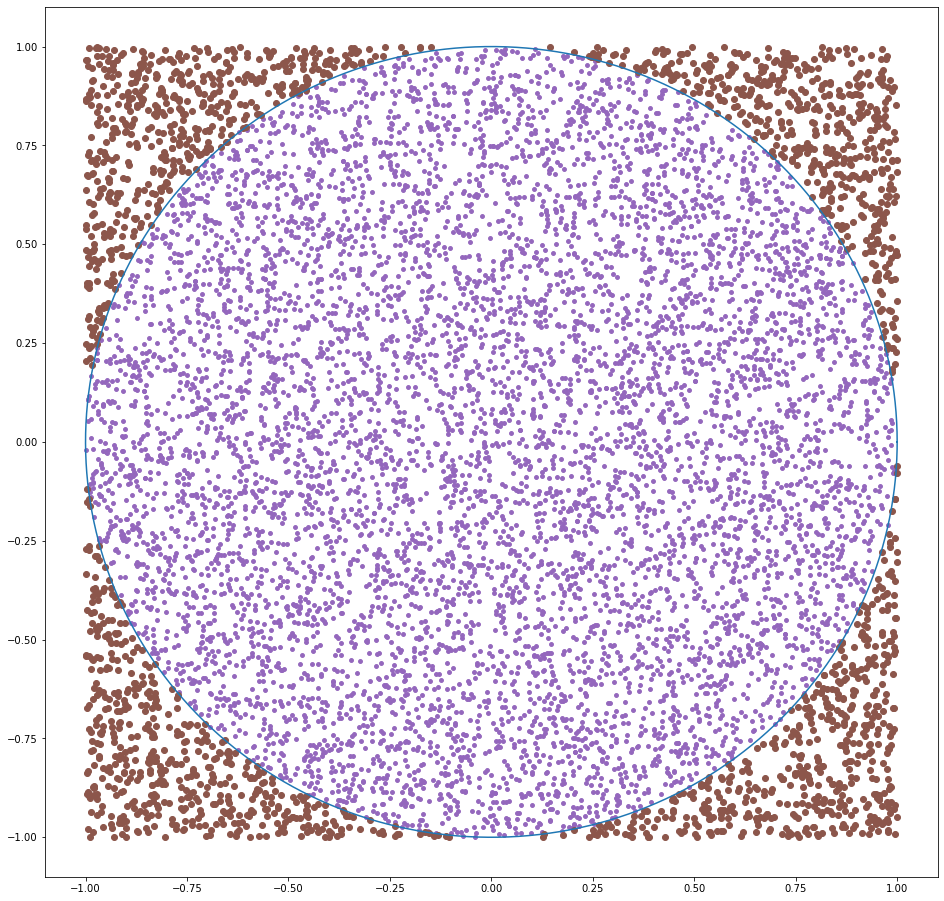

In [12]:
PiPlot(10000)

**Exercise 5.4**: The aim of this exercise is to generate a set of two-dimensional random walks, plot their trajectories and look and the end point distribution. The random walks considered always begin at the origin and take Nstep random steps of unit or zero size in both directions in the x and y axis. For a total number of Nw walks:

1. Compute the trajectories and save the final point of all of them.
2. Plot a sample of these random walks in the plane.
3. Plot all the final points together.
4. Compute the average distance of the final points from the origin.
5. Plot a histogram with the values of the distance to the origin.

In [13]:
N = 100 # step count
n = 1000 # number of walks
# size:  2 for x and y, step count, and the number of walks
steps = np.random.randint(-1, 2, (2, N, n))
steps = np.concatenate((np.full((2,1,1000), 0), steps), axis=1) # must start from the origin

In [14]:
# 1. Compute the trajectories and save the final point of all of them.
trajectories = np.cumsum(steps, axis=1)
finPoints = trajectories[:,-1,:]

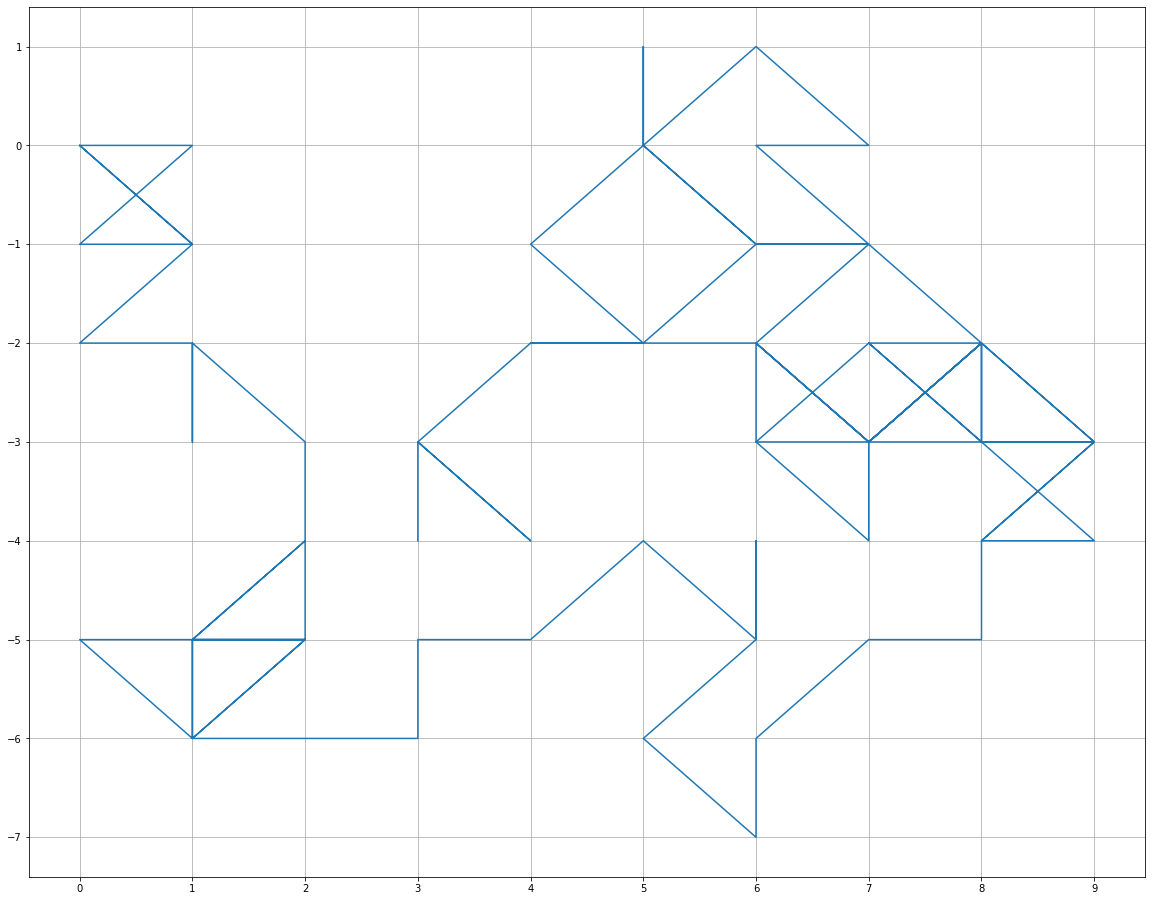

In [15]:
# 2. Plot a sample of these random walks in the plane.
# first one is plotted
trajectory = trajectories[:,:,0]
plt.plot(*trajectory)
plt.xticks(np.arange(np.min(trajectory[0,:]), np.max(trajectory[0,:]) + 1))
plt.yticks(np.arange(np.min(trajectory[1,:]), np.max(trajectory[1,:]) + 1))
plt.grid(which="both")

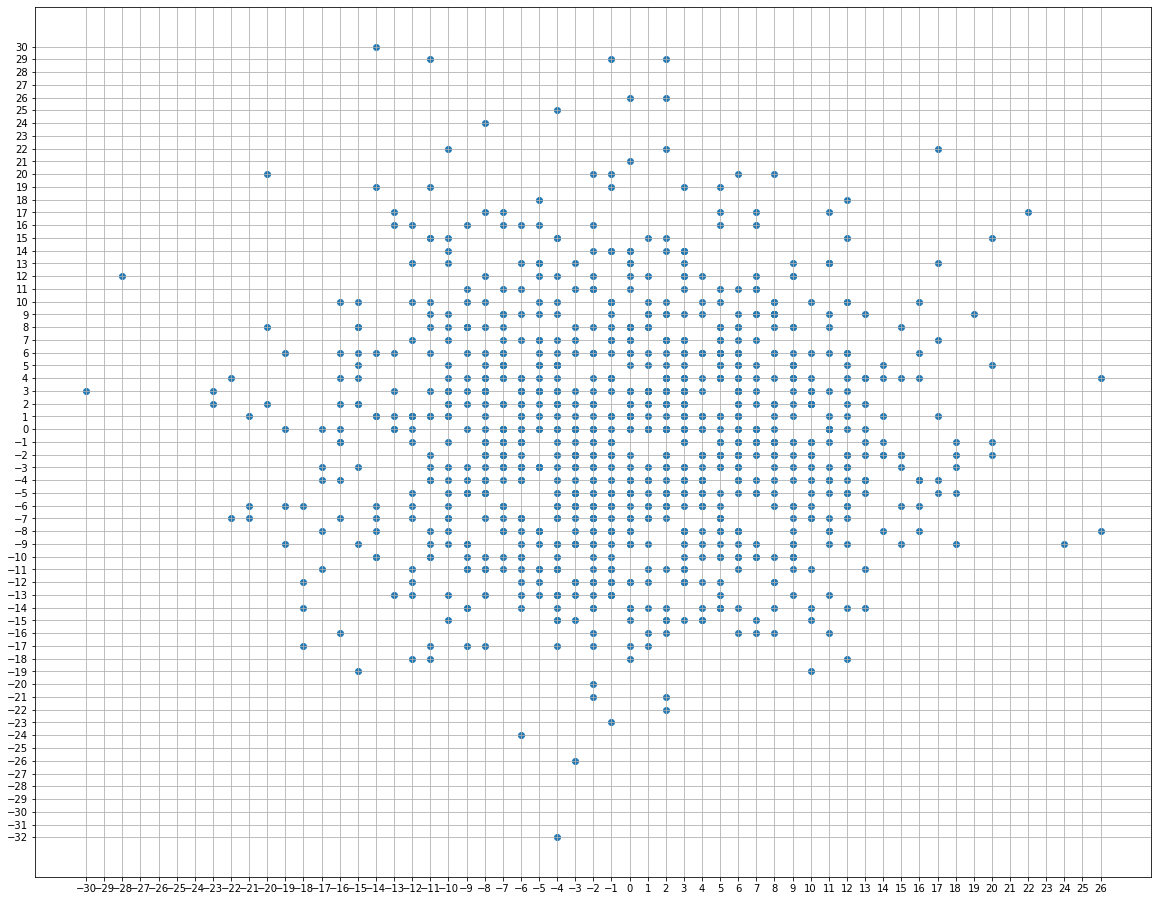

In [16]:
plt.scatter(*finPoints)
plt.xticks(np.arange(np.min(finPoints[0]), np.max(finPoints[0] + 1)))
plt.yticks(np.arange(np.min(finPoints[1]), np.max(finPoints[1] + 1)))
plt.grid()

In [17]:
# 4. Compute the average distance of the final points from the origin.
np.sqrt((finPoints**2).sum(0)).sum() / n

10.695674250260018

Text(0.5, 0, 'distance')

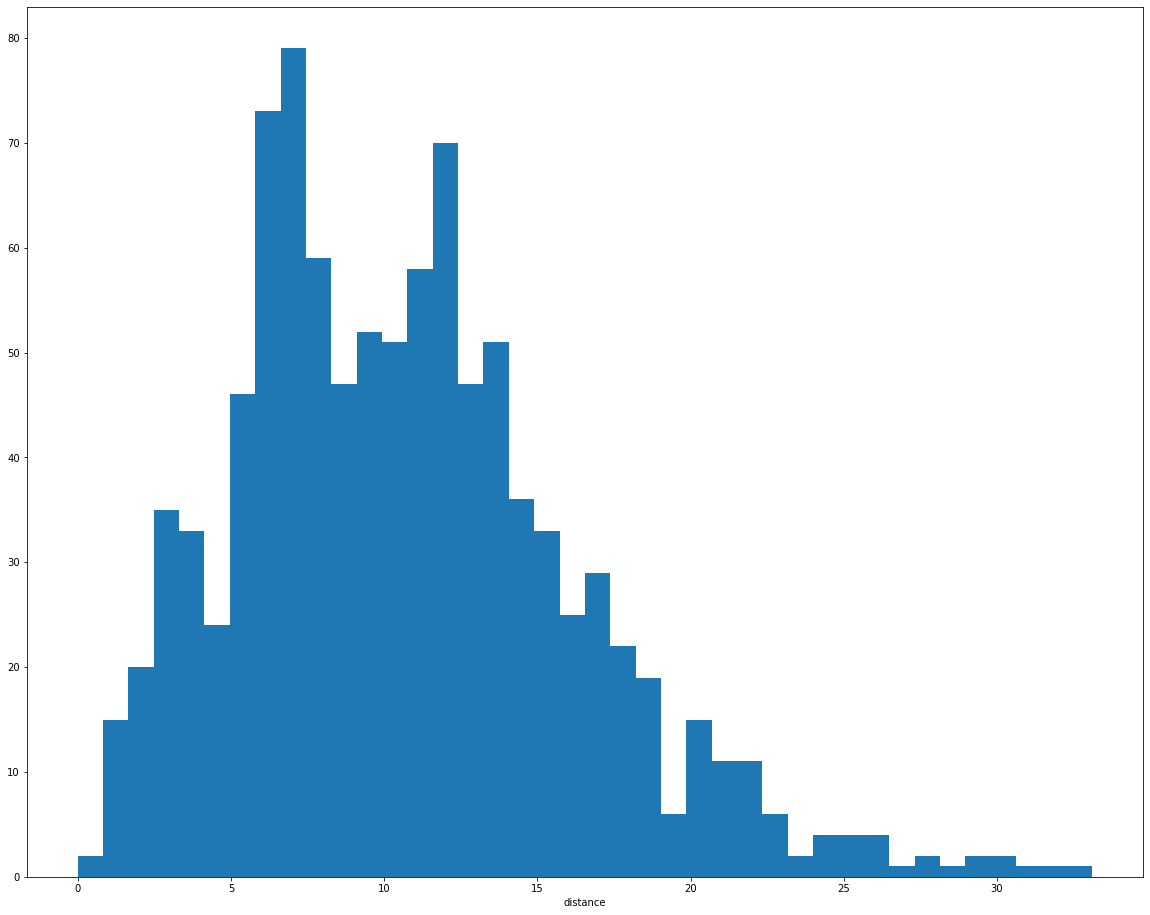

In [18]:
# 5. Plot a histogram with the values of the distance to the origin.
plt.hist(np.sqrt((finPoints**2).sum(0)), bins=40)
plt.xlabel("distance")

**Exercise 5.5**: The Julia set is an important concept in fractal theory. Given a complex number a, a point z in the complex plane is said to be in the filled-in Julia set of a function f(z) = z² + a if the iteration of the function over the point does not finish with the point going to infinity. It can be proved that, if at some iterate of a point under f(z) the result has a module larger than 2 and larger than the module of a, this point will finish going to infinity. Build and plot the filled-in Julia sets for f(z) with a = (-0.5,0),(0.25,-0.52), (-1,0), (-0.2, 0.66) in the interval of -1 < Re(z), Im(z) < 1 and consider that the point belongs to the set once the previous condition has not been accomplished after Niter = 100. Hint: You can make use of the NumPy meshgrid and the PyPlot pplot functions for displaying the filled-in Julia sets.

In [19]:
def f(z, a): return z**2 + a

In [20]:
def isJulia(z, a):
    for i in range(100): 
        z = f(z, a)
        if abs(z) > 2: break # without this it overflows
    return 1 if abs(z) < 2 and abs(z) < abs(a) else 0
np.julia = np.vectorize(isJulia)

In [21]:
N=2000
xx, yy = np.meshgrid(np.linspace(-1, 1, N), np.linspace(-1, 1, N))

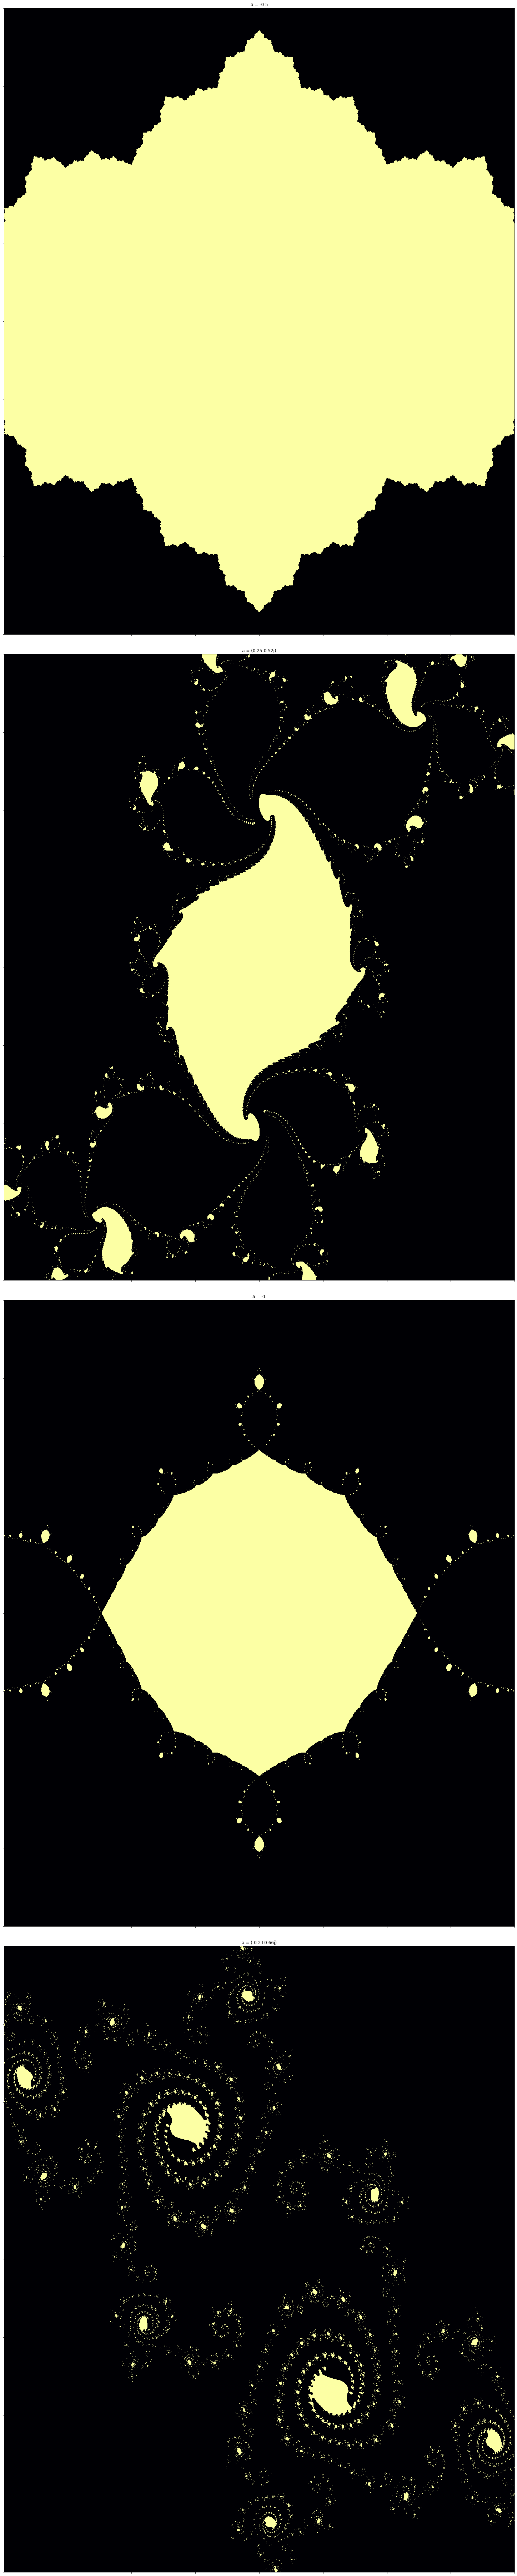

In [22]:
import matplotlib
fig, axs = plt.subplots(4, 1, figsize=(20,100), constrained_layout=True, sharex=True)
a = [-0.5, 0.25 - 0.52j, -1, -0.2 + 0.66j] 
for i in range(4):
    axs[i].pcolormesh(np.julia(xx + yy*1j, a[i]), cmap=matplotlib.cm.get_cmap('inferno'))
    axs[i].set_title(f"a = {a[i]}")
    axs[i].xaxis.set_ticklabels([])
    axs[i].yaxis.set_ticklabels([])